In [2821]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2822]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

#We see the general outline of our data and can get an idea which features should be numerical and which categorical
#From here we can understand that customerID is meaningless as it is simply used to identify each customer and should have no correlation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2823]:
data.drop('customerID', axis=1, inplace=True)
data.shape

(7043, 20)

In [2824]:
data.drop_duplicates()
data.info()

#TotalCharges is categorised as an object type but we understand that it should be a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [2825]:
data.describe()
#We saw that TotalCharges is an object type and hence it doesn't appear here, so we need to convert it to float 
#We also see that there are very few numerical features meaning the majority will be categorical 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [2826]:
data.isnull().sum().sort_values(ascending=False)
#no null values

gender              0
SeniorCitizen       0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
Churn               0
dtype: int64

In [2827]:
#data['TotalCharges'] = data['TotalCharges'].astype(float)
#the above code to convert the variable type resulted in an error,
#"could not convert string to float: ' '", indicating there are space string values

(data['TotalCharges'] == ' ').sum()

11

In [2828]:
#there are 11 instances of space string values so we can drop them
data = data[~(data['TotalCharges'] == ' ')]

data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].astype
#Much better 

<bound method NDFrame.astype of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64>

In [2829]:
data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})


/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/49344807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})


In [2830]:
#Lists representing our numerical and categorical feature types
numeric = data.select_dtypes(include=np.number).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.to_list()

numeric.remove('SeniorCitizen')
categorical.append('SeniorCitizen')


print(numeric)
print(categorical)

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [2831]:
data['Churn'].value_counts()
#Our dataset is unbalanced 

Churn
0    5163
1    1869
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

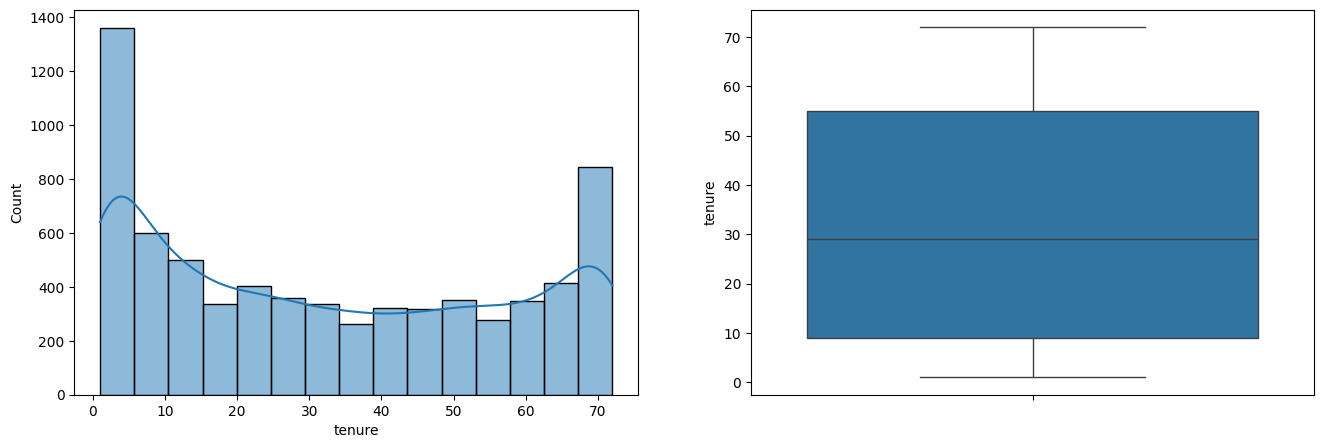

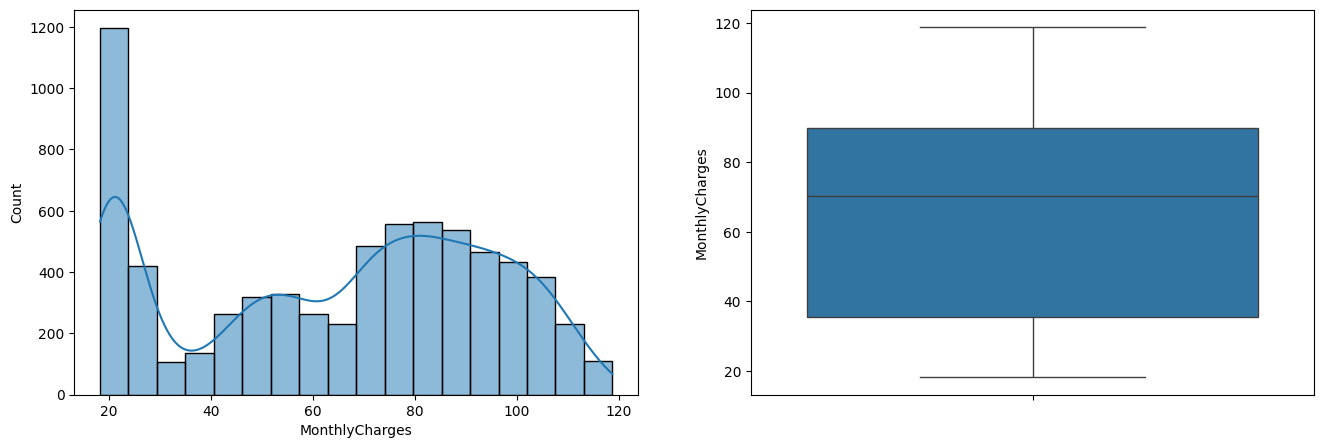

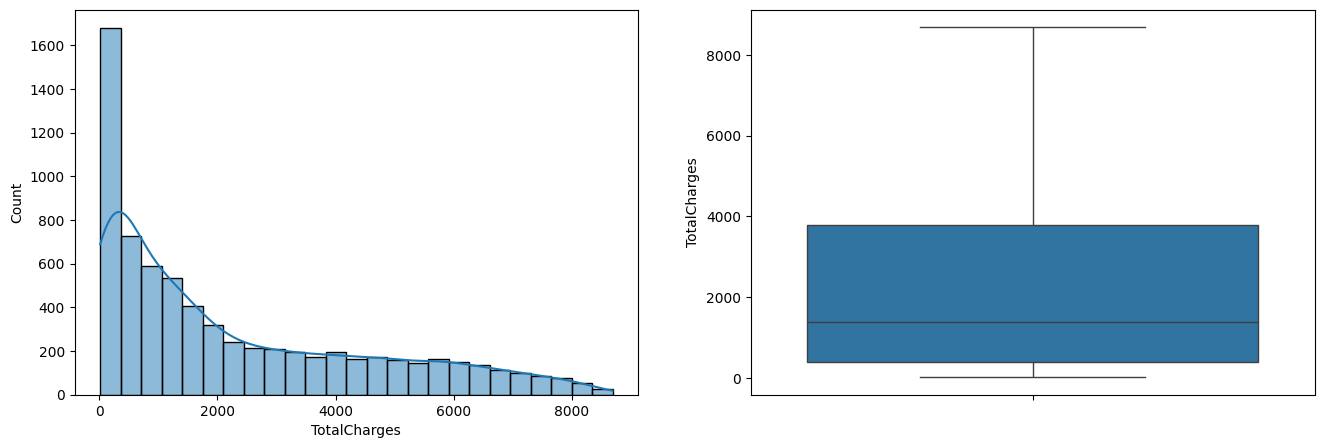

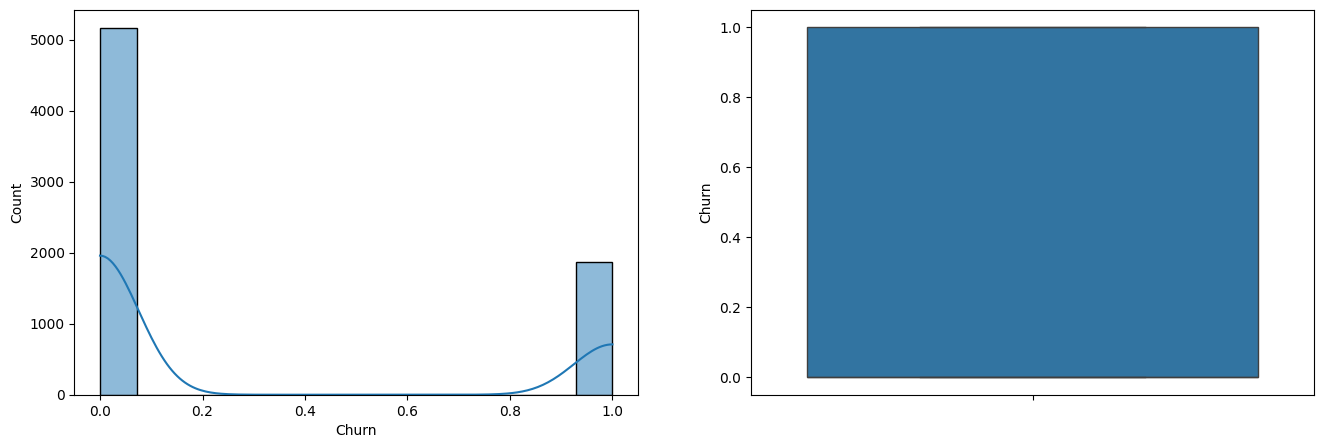

In [2832]:
for col in numeric:    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(data[col])

#It seems that there are no outliers in our numerical features

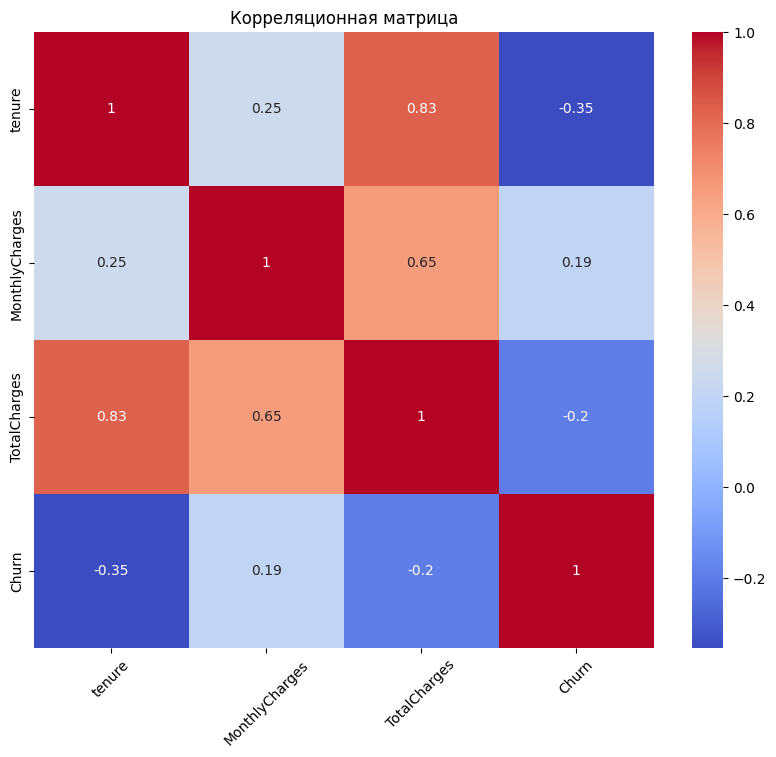

In [2833]:
correlation = data[numeric].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.show()

#There is a medium correlation between Churn and tenure with -0.35 
#a low correlation with Monthly and TotalCharges of 0.19 and -0.2
#There is a medium correlation between monthly and totalcharges with 0.65 value
#which is to be expected from their names and a 

#There is a high correlation value between the tenure and totalCharges of 0.83.
#Tenure has a higher correlation with Chum of -0.35 compared to 0.2 so we can consider
#deleting TotalCharges to reduce the chance of overfitting and simplify our model
#without neccesarily reducing our metric scores
#PCA them together ??

In [2834]:
for col in categorical:
    print(col, data[col].unique())



gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen [0 1]


In [2835]:
data['Contract'].value_counts()
#it makes sense for contract to be an ordinal variable
#hence one-label encoding will be used

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [2836]:
ordinal = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
data['Contract'] = data['Contract'].replace(ordinal)
categorical.remove('Contract')

correlation = data['Contract'].corr(data['Churn'])
print(correlation)
#A value of -0.4 suggest a moderate correlation, so we can assume
#that our assumption of Contract being an ordinal variable was correct

data[data['Churn'] == 1]['Contract'].value_counts()

-0.39614953299365463


/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/2085004929.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Contract'] = data['Contract'].replace(ordinal)


Contract
0    1655
1     166
2      48
Name: count, dtype: int64

In [2837]:
#Lists of demografical and behavioral features to analyse against our target variable
#Excluding what we analysed previously
demographic = ["gender", "SeniorCitizen", "Partner", "Dependents"]
behavioral = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
              "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
              "PaperlessBilling", "PaymentMethod"]

#The one hot encoding in the next code box will create new columns so we will make a copy to help us
#visualize the relevance of the feature later on
data_behavioral = data[behavioral + ['Churn']].copy()

In [2838]:
data['OnlineBackup'].value_counts()
#Features with "No internet service" possible values are tricky as there are many instances of it
#hence any assumptions we make can and will make a difference, therefore it is safer to use one-hot 
#encoding. Another option could be label-encoding with {no service: 0, no: 1, yes: 2} or assume that
#"No internet service" values are meant to be "No"


OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

In [2839]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [2840]:
#one-hot encoding our categorical values

binary = {'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1}

for col in categorical:
    if (data[col].unique().size == 2):
        data[col] = data[col].replace(binary)
    elif (data[col].unique().size > 2):
        #one hot encode the rest using pandas get_dummies
        #drop_first=True drops one column so we avoid the problem of multicollinearity
        dummies = pd.get_dummies(data[col], columns=[col], prefix=col, drop_first=True).astype(int)
        data = pd.concat([data, dummies], axis=1)
        data.drop(col, axis=1, inplace=True)

data.shape

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/2431112850.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(binary)
/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/2431112850.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(binary)


(7032, 30)

In [2841]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [2842]:
data[data['Churn'] == 1].describe().T['mean']

gender                                      0.497592
SeniorCitizen                               0.254682
Partner                                     0.357945
Dependents                                  0.174425
tenure                                     17.979133
PhoneService                                0.909042
Contract                                    0.140182
PaperlessBilling                            0.749064
MonthlyCharges                             74.441332
TotalCharges                             1531.796094
Churn                                       1.000000
MultipleLines_No phone service              0.090958
MultipleLines_Yes                           0.454789
InternetService_Fiber optic                 0.693954
InternetService_No                          0.060460
OnlineSecurity_No internet service          0.060460
OnlineSecurity_Yes                          0.157838
OnlineBackup_No internet service            0.060460
OnlineBackup_Yes                            0.

In [2843]:
for col in demographic:
    print(col, data[col].unique())

#It seems we only have binary values in our demographic column so we
#can test and see if we can use the mean to find out if there is a bias 
#towards a positive outcome


gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]


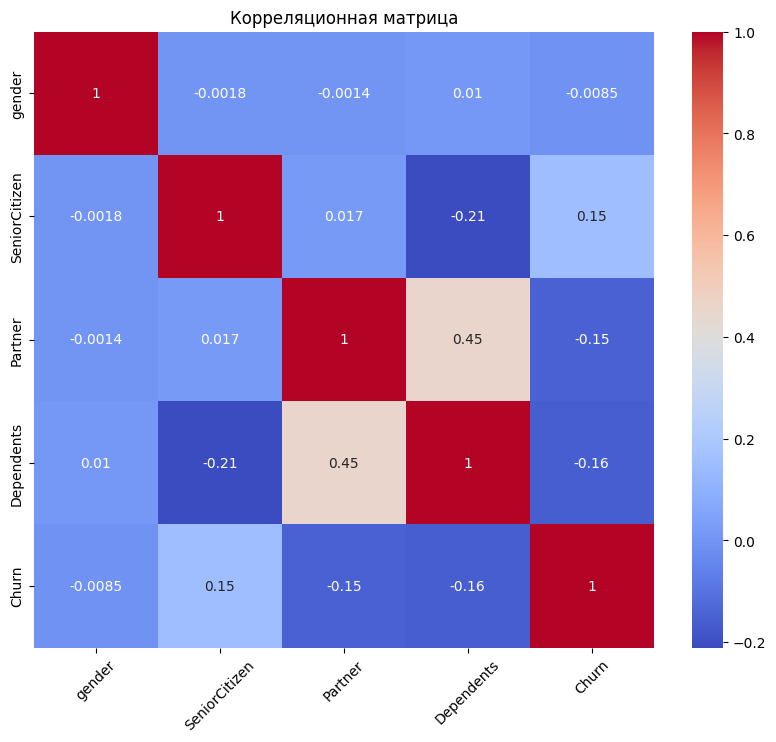

In [2844]:
correlation = data[demographic + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.show()

#We can see there is a weak correlation value between seniorCitizen, Partner and Dependents
#features against Churn of about 0.15-0.16 meaning they don't contribute much
#There however is a medium correlation between dependents and partner features with 
#a value of 0.45, it makes sense assuming a partner is considered a dependency 
#A low correlation between dependents and seniorCitizen of 0.21

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/3377705752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

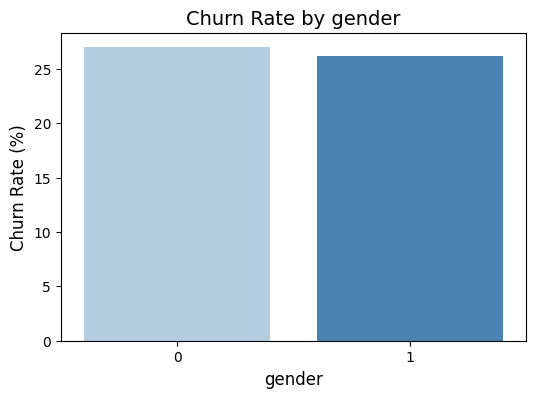

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/3377705752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

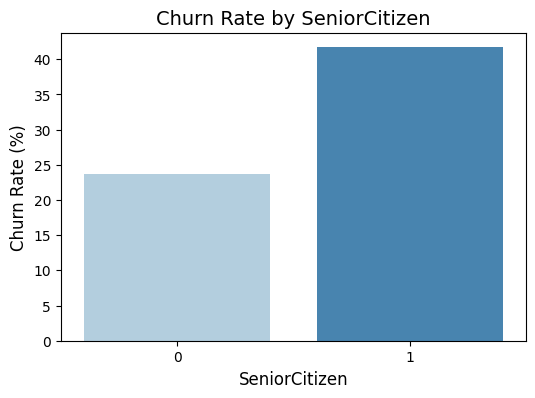

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/3377705752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

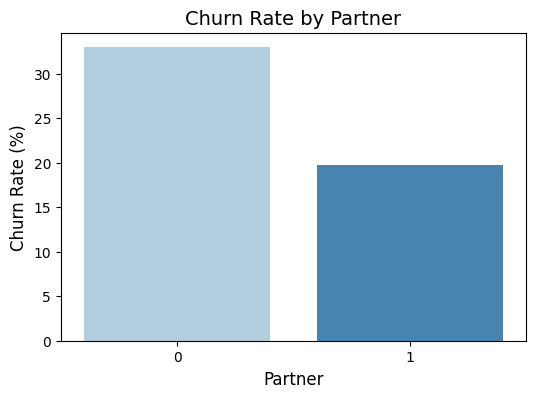

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/3377705752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

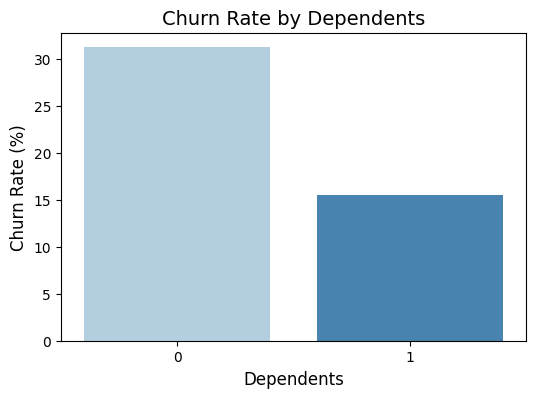

In [2845]:
for feature in demographic:
    churn_rate = data.groupby(feature)['Churn'].mean().reset_index()
    churn_rate['Churn'] = churn_rate['Churn'] * 100  
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
    plt.title(f"Churn Rate by {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Churn Rate (%)", fontsize=12)
    plt.show()

Demographics analysis:

- It seems that gender doesn't affect the churn rate
- A senior citizen is considerably more likely to churn
- A client without a partner and any dependants is considerably less likely 
  to churn, we assume it is true because such client probably has less
  financial burden. We also see that they have a similar churn rate distribution
  and this was to be expected as we found they have a decent corr index of 
  0.45. A possible other candidate for removal

In [2846]:
'''for col in demographic:
    print(col, data[data['Churn'] == 1][col].mean())'''

#as we see the mean for gender is around 0.5 meaning it doesn't contribute towards a positive outcome
#A low average of ~0.25 for SeniorCitizen means that there is a higher churn probability for non-seniors

#Scrapped logic due to the imbalance in the features values

"for col in demographic:\n    print(col, data[data['Churn'] == 1][col].mean())"

In [2847]:
data[data['Churn'] == 1]['SeniorCitizen'].value_counts()

SeniorCitizen
0    1393
1     476
Name: count, dtype: int64

In [2848]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

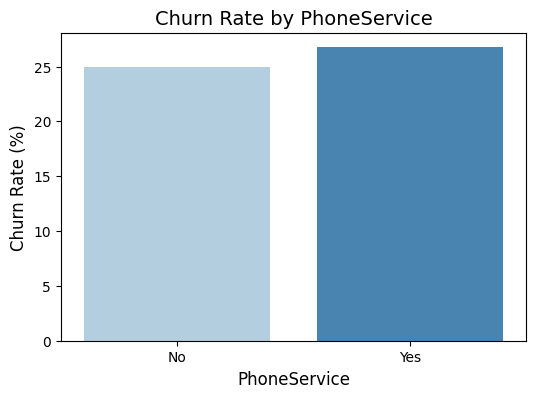

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

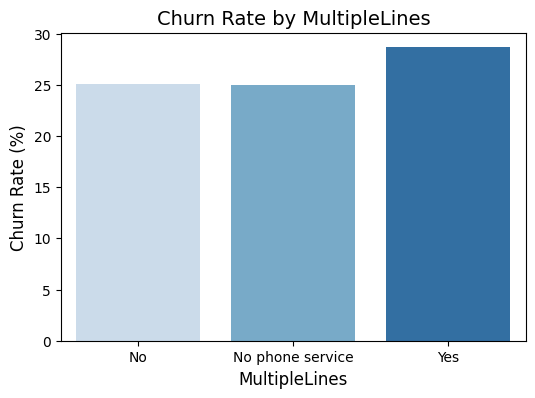

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

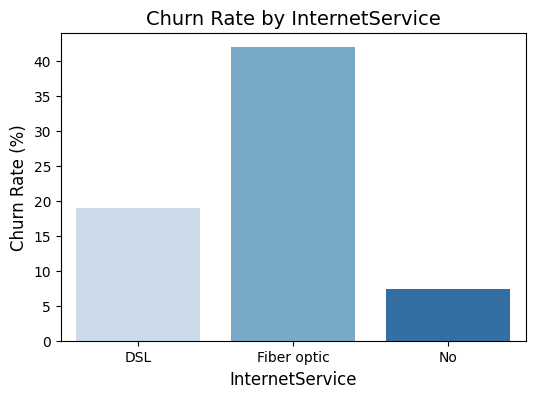

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

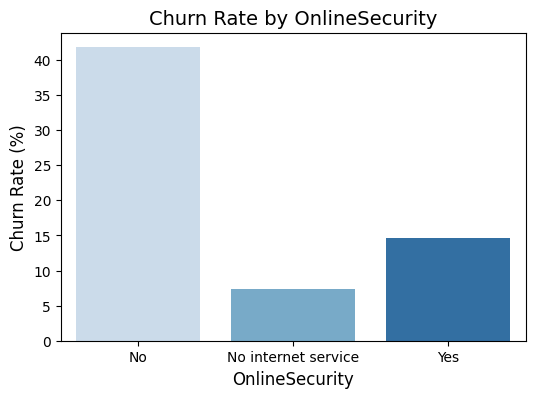

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

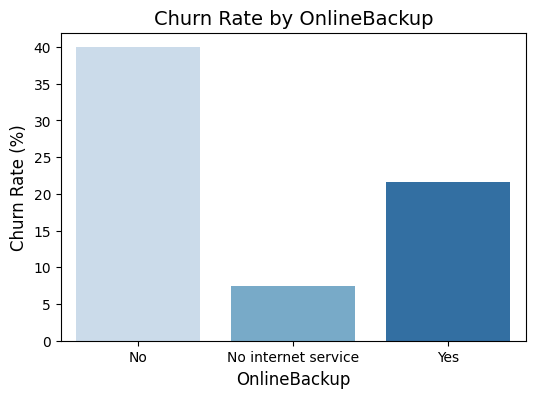

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

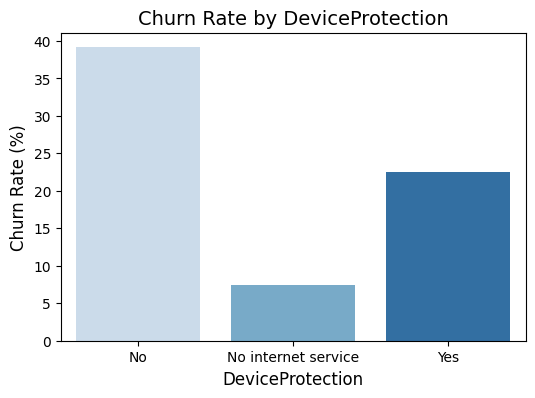

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

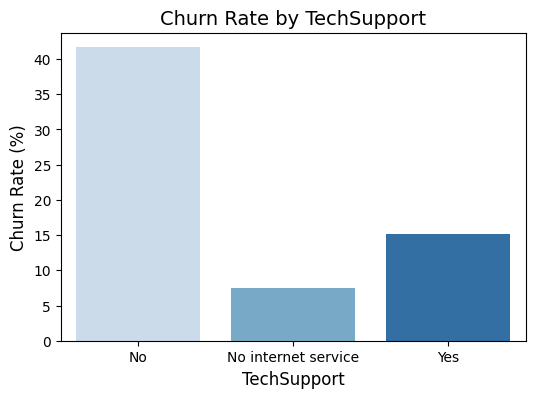

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

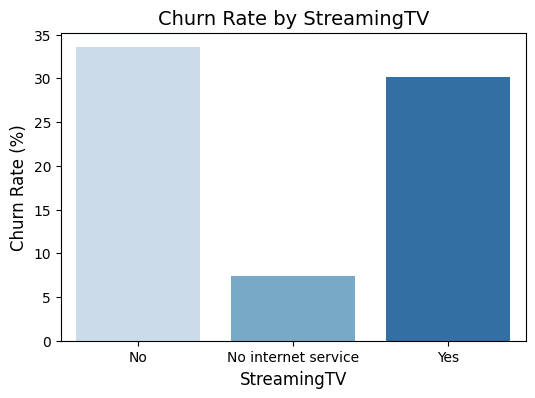

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

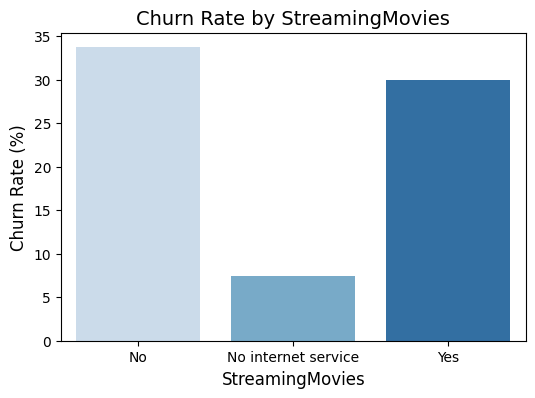

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

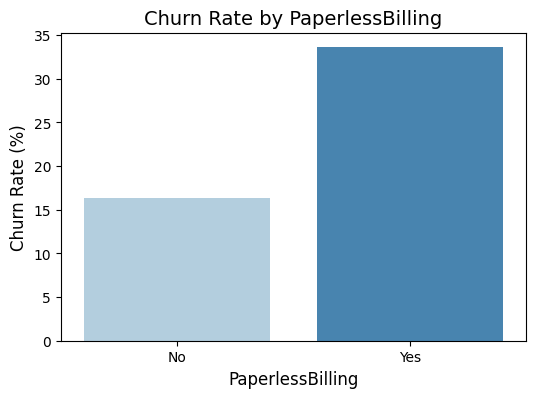

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_41929/612580772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

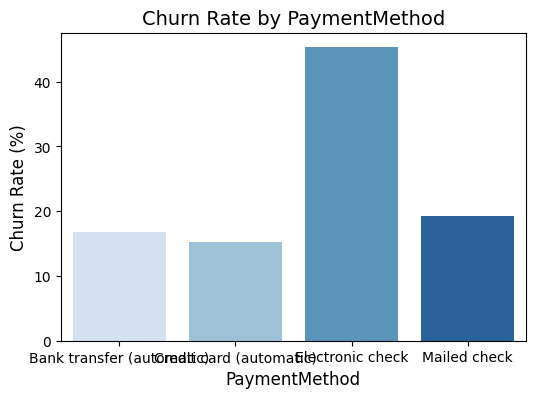

In [2849]:
'''
demographic = ["gender", "SeniorCitizen", "Partner", "Dependents"]
behavioral = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
              "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
              "PaperlessBilling", "PaymentMethod"]
'''

for feature in behavioral:
    churn_rate = data_behavioral.groupby(feature)['Churn'].mean().reset_index()
    churn_rate['Churn'] = churn_rate['Churn'] * 100  
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature, y='Churn', data=churn_rate, palette='Blues')
    plt.title(f"Churn Rate by {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Churn Rate (%)", fontsize=12)
    plt.show()
    #correlation = data_behavioral[feature].corr(data['Churn'])
    #print(correlation)


#data_behavioral.head()


What we get from this visual analysis of our behavioral features:

- MultipleLines and PhoneService have similar churn rates across their respective categories so they don't contribute to the target variable, consider removing them
- Customers with fiberoptic Internet Service have a much higher churn rate than other internet services with 42% against 19% and 7%
- Much higher churn rate for customers with no Online Security
- OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport have almost exactly similar churn rate distribution, makes sense since they share a common theme, considering removing all but 1 of them
- People with and without StreamingService or StreamingMovies have similar chance of being a churner (34% for No and 30% for Yes) and 7% for "No internet service", considering removing all but 1
- Customers with PaperlessBilling service have higher churnrate than those without (33% vs 16%)
- Customers with an electronic check PaymentMethod have by far the highest Churning rate of 43% compared to ~16-18% for the rest payment methods


In [2850]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


In [2851]:
#Numerical features we will normalize
num_normalize = [col for col in numeric if col != 'Churn']

#Normalizer class, we will use mean and std to normalize our features
class Normalizer:
    def __init__(self, vec):
        self.mean = vec.mean()
        self.std = vec.std()

    def prepro(self, vec):
        return (vec - self.mean) / self.std

    def rev_prepro(self, vec):
        return vec * self.std + self.mean

In [2852]:
#This approach to normalization allows us to save the mean and std used for the normalization of each feature
#in case we will need to revert back the values for better comprehension, good practice I think
normalizers = {}

for feature in num_normalize:
    normalizer = Normalizer(data[feature].values)
    normalizers[feature] = normalizer
    data[feature] = normalizer.prepro(data[feature].values)

In [2853]:
normalizers['MonthlyCharges'].mean

64.79820819112628

In [2854]:
#Split our data into train and val datasets for both X and target

X = data.drop(["Churn"], axis=1)
y = data["Churn"]

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=data["Churn"])

In [2855]:
class ChurnNN(nn.Module):
    def __init__(self):
        super(ChurnNN, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.05)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)  
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)  
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)  
        x = self.sigmoid(self.fc4(x))
        return x

In [2856]:
model = ChurnNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() 
    outputs = model(X_train)  
    train_loss = criterion(outputs, y_train) 
    train_loss.backward()  
    optimizer.step() 

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        train_losses.append(train_loss.item())
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())
    

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss.item():.4f}')

Epoch [10/200], Loss: 0.5498
Epoch [20/200], Loss: 0.5245
Epoch [30/200], Loss: 0.5079
Epoch [40/200], Loss: 0.4917
Epoch [50/200], Loss: 0.4816
Epoch [60/200], Loss: 0.4702
Epoch [70/200], Loss: 0.4612
Epoch [80/200], Loss: 0.4534
Epoch [90/200], Loss: 0.4436
Epoch [100/200], Loss: 0.4372
Epoch [110/200], Loss: 0.4338
Epoch [120/200], Loss: 0.4268
Epoch [130/200], Loss: 0.4221
Epoch [140/200], Loss: 0.4181
Epoch [150/200], Loss: 0.4143
Epoch [160/200], Loss: 0.4113
Epoch [170/200], Loss: 0.4064
Epoch [180/200], Loss: 0.4041
Epoch [190/200], Loss: 0.4015
Epoch [200/200], Loss: 0.4007


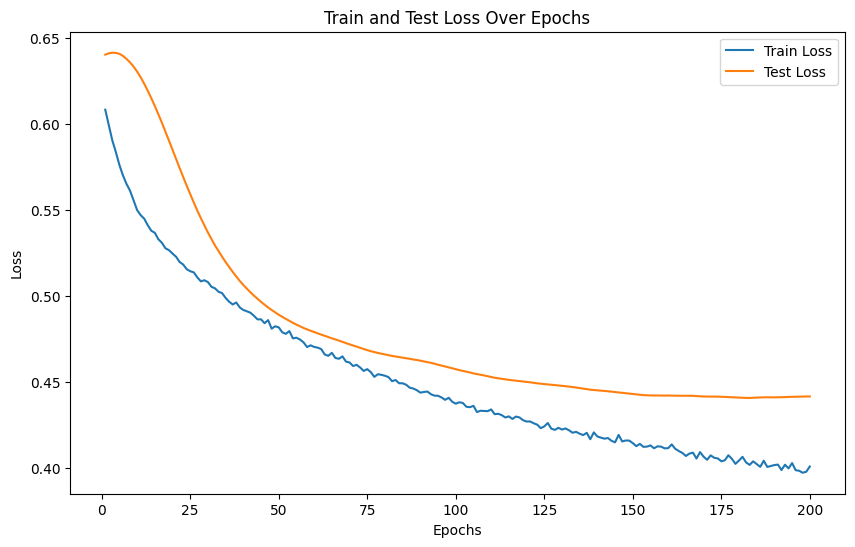

In [2857]:
# Plot Train/Test Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

#As we see both train and test loss are decreasing at a similar rate as epochs go by but 
#after around ~130 epoch the losses are beginning to diverge as test loss decrease starts
#to slowdown implying that the model is starting to overtrain which can lead to overfit.

In [2858]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model.eval()  
with torch.no_grad():
    test_predictions = model(X_test)
    y_test_pred = (test_predictions >= 0.40).float()
    test_loss = criterion(test_predictions, y_test)

        
y_test_pred_np = y_test_pred.cpu().numpy()
y_test_np = y_test.cpu().numpy()


accuracy = accuracy_score(y_test_np, y_test_pred_np)
precision = precision_score(y_test_np, y_test_pred_np)
recall = recall_score(y_test_np, y_test_pred_np)
f1 = f1_score(y_test_np, y_test_pred_np)

print(f'Test Loss: {test_loss.item():.4f}')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#The test loss is similar to our train test loss reached at the end so we assume the model generalised well and is not overfitting
#The threshold was reduced to 0.4 to give emphasis on recall - the true positive rate, metric of how many true instances were labeled true - which 
#led to an increase from 0.55 to 0.7, making it a suitable tool for business decisions, although nothing more than an additional tool since the 
#other metrics aren't the best. The threshold change slightly reduced our precision but the recall gain is worth it as it shows us 
#the true positives rate and hence a useful metric in our case

#If we know with a 70% probability that a customer will churn we might call them and offer to change them their plan, do something to make them stay
#If it was a false positive customer then you just did a check up and showed that the business is listening to its customers 

Test Loss: 0.4414
Accuracy: 0.7818
Precision: 0.5727
Recall: 0.7059
F1 Score: 0.6323


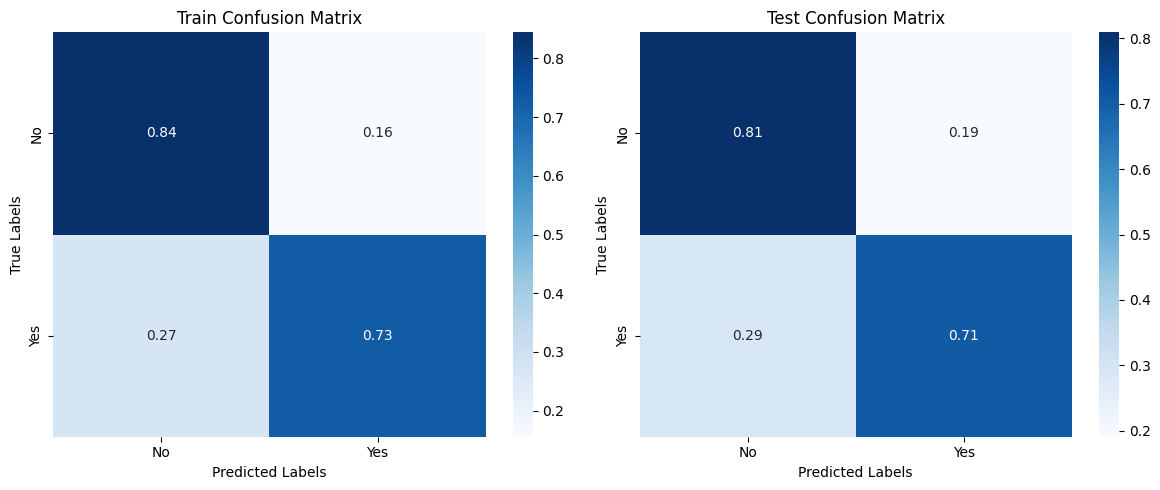

In [2859]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute and plot the confusion matrix

#In the cell before we argued for the threshold value = 0.4
model.eval()
with torch.no_grad():
    train_predictions = model(X_train)
    y_train_pred = (train_predictions >= 0.4).float()  


y_train_pred_np = y_train_pred.cpu().numpy()
y_train_np = y_train.cpu().numpy()

train_cm = confusion_matrix(y_train_np, y_train_pred_np, normalize='true')
test_cm = confusion_matrix(y_test_np, y_test_pred_np, normalize='true')

#Normalize our confusion matrix for the total number of instances instead of instances of a class,
#This tyoe of normalization can be used to highlight our class imbalance
cm_train_normalized = train_cm / train_cm.sum()
cm_test_normalized = test_cm / test_cm.sum()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Train Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

#As we can see the values are pretty similar indicating that our model generalised well 
#and are inline with my expectations as our dataset is heavily unbalanced

#The confusion matrix show that we 

In [2860]:
#F1 macro score for train and test dataset

f1_train_macro = f1_score(y_train_np, y_train_pred_np, average='macro')
f1_test_macro = f1_score(y_test_np, y_test_pred_np, average='macro')

print(f"F1 Macro Score (Train): {f1_train_macro:.4f}")
print(f"F1 Macro Score (Test): {f1_test_macro:.4f}")

#The f1 macro score is lower on the test set indicating a slight overfit
#Our f1 macro score is signifantly higher than normal f1 (0.61) as it was skewed by the class imbalance
#but as f1 macro score treats each class equally, it doesn't have such problem. 
#A higher f1 macro score indicates that our model is better at identifying the minority class
#as otherwise there wouldn't be such a discrepancy


F1 Macro Score (Train): 0.7715
F1 Macro Score (Test): 0.7386
